# Challenge 3: scikit-learn
Perform the following:
- Choose an algorithm from scikit-learn documentation
- Train the model with the preprocessed image array data from Challenge 2
- Predict the class of the following piece of gear with the model: https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg 
- Using your methods from Challenge 2, preprocess the test set.
- Evaluate the model with a confusion matrix to see how individual classes performed (use test set)
- Output the overall accuracy (use test set)

## 1. Creating the dataset

In [2]:
from os import walk, listdir
from os.path import isfile, join
import cv2
import numpy as np

def load_dataset(folder):
    X = []
    y = []
    for (dir_path, _, _) in walk(folder):
        label = dir_path.replace(folder, '').replace('\\', '').replace('/', '')
        files = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
        for file in files:
            img = cv2.imread(join(dir_path, file))
            X.append(img)
            y.append(label)
    return np.array(X).reshape((len(y), -1)), np.array(y)

X, y = load_dataset("data/gear_images_preprocessed")

print(X[3])
print(X[3].shape)
print(128*128*3)
print(y)
print("Dataset shape:", X.shape, y.shape)

[255 255 255 ... 255 255 255]
(49152,)
49152
['harnesses' 'harnesses' 'harnesses' ... 'helmets' 'helmets' 'helmets']
Dataset shape: (2122, 49152) (2122,)


## 2. Split labeled data to learning and testing

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print("Train dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Train dataset shape: (1421, 49152) (1421,)
Test dataset shape: (701, 49152) (701,)


## 3. Training the model

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    verbose=True, 
    random_state=42,
    n_estimators=2000,
    n_jobs=-1
)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   31.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=True,
            warm_start=False)

## 4. Testing the model

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 2000 out of 2000 | elapsed:    0.7s finished


Accuracy score:  0.8858773181169758


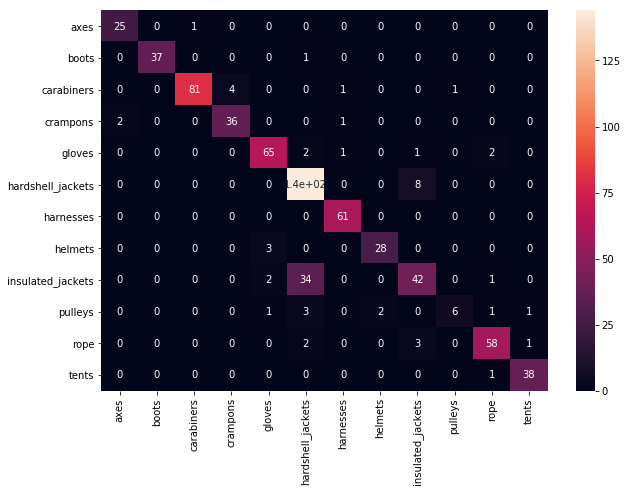

[[ 25   0   1   0   0   0   0   0   0   0   0   0]
 [  0  37   0   0   0   1   0   0   0   0   0   0]
 [  0   0  81   4   0   0   1   0   0   1   0   0]
 [  2   0   0  36   0   0   1   0   0   0   0   0]
 [  0   0   0   0  65   2   1   0   1   0   2   0]
 [  0   0   0   0   0 144   0   0   8   0   0   0]
 [  0   0   0   0   0   0  61   0   0   0   0   0]
 [  0   0   0   0   3   0   0  28   0   0   0   0]
 [  0   0   0   0   2  34   0   0  42   0   1   0]
 [  0   0   0   0   1   3   0   2   0   6   1   1]
 [  0   0   0   0   0   2   0   0   3   0  58   1]
 [  0   0   0   0   0   0   0   0   0   0   1  38]]


In [5]:
%matplotlib inline

from sklearn import metrics  
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Calculate score
y_pred  = clf.predict(X_test)

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred, normalize=True))
df_cm = pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred), 
    index=np.unique(y_test), 
    columns=np.unique(y_test)
)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()
print(metrics.confusion_matrix(y_test, y_pred))

## 5. Using the model

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 2000 out of 2000 | elapsed:    0.3s finished


Answer: ['pulleys']


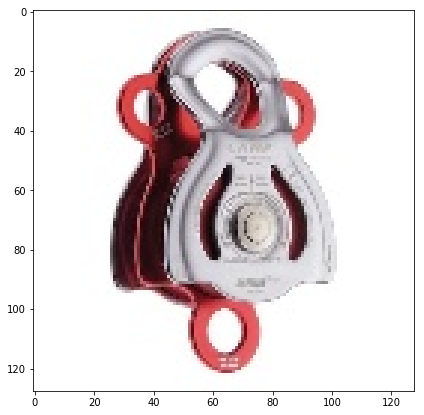

In [17]:
import cv2 

path = "data/gear_images_preprocessed/pulleys/10308568_zm.jpg"
img = cv2.imread(path)
print("Answer:", clf.predict([img.reshape(-1)]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(1, figsize=(10, 7))
plt.imshow(img)
plt.show()